In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Rectangle

In [4]:
folder_120 = "/data/public/NANO_dual_energy/20211205_cirs_phantom_kvs/120kV/2021-12__Studies/drr"
folder_140 = "/data/public/NANO_dual_energy/20211205_cirs_phantom_kvs/140kV/2021-12__Studies/drr"
folder_80 = "/data/public/NANO_dual_energy/20211205_cirs_phantom_kvs/80kV/2021-12__Studies/drr"
array_names_list_120 = sorted(os.listdir(folder_120))
array_names_list_140 = sorted(os.listdir(folder_140))
array_names_list_80 = sorted(os.listdir(folder_80))

In [3]:
idx = 90
# idx = np.random.randint(0, 360)
filepath_120 = os.path.join(folder_120, array_names_list_120[idx])
filepath_140 = os.path.join(folder_140, array_names_list_140[idx])
filepath_80 = os.path.join(folder_80, array_names_list_80[idx])
idx

90

In [4]:
with open(filepath_120, 'rb') as f:
    sample_drr_120 = np.load(f)
    
with open(filepath_140, 'rb') as f:
    sample_drr_140 = np.load(f)
    
with open(filepath_80, 'rb') as f:
    sample_drr_80 = np.load(f)

In [5]:
sample_drr_120 += np.min(sample_drr_120)
sample_drr_140 += np.min(sample_drr_140)
sample_drr_80 += np.min(sample_drr_80)

processed_120 = 10*np.log((sample_drr_120+0.1)/(np.max(sample_drr_120)+0.1))
processed_140 = 10*np.log((sample_drr_140+0.1)/(np.max(sample_drr_140)+0.1))
processed_80 = 10*np.log((sample_drr_80+0.1)/(np.max(sample_drr_80)+0.1))

subtracted_dict = {}
for weight in range(60, 70):
#     weight = 0.65
    weight /= 100
    dual_energy_soft = processed_140 - weight*processed_80
#     weight = 1
    # TO DO try different weights for bone?
    dual_energy_bone = -1*(processed_140 - 1*processed_80)
    # dual_energy_bone = weight * processed_140 - weight*processed_80

    mean_s = np.mean(dual_energy_soft[120:200, 50:150])
    std_s = np.std(dual_energy_soft[120:200, 50:150])
    w=3
    vmin_s = mean_s - w*std_s
    vmax_s = mean_s + w*std_s

    mean_b = np.mean(dual_energy_bone[50:150, 50:150])
    std_b = np.std(dual_energy_bone[50:150, 50:150])
    w=3
    vmin_b = mean_b - w*std_b
    vmax_b = mean_b + w*std_b

    mean_0 = np.mean(processed_120[50:150, 50:150])
    std_0 = np.std(processed_120[50:150, 50:150])
    w=3
    vmin = mean_0 - w*std_0
    vmax = mean_0 + w*std_0
    
    subtracted_dict[weight] = {'Bone': dual_energy_bone,
                               'Soft': dual_energy_soft,
                               'vmin_s': vmin_s,
                               'vmax_s': vmax_s,
                               'vmin_b': vmin_b,
                               'vmax_b': vmax_b,
                               'vmin': vmin}

In [6]:
sample_drr_120 += np.min(sample_drr_120)
sample_drr_140 += np.min(sample_drr_140)
sample_drr_80 += np.min(sample_drr_80)

processed_120 = 10*np.log((sample_drr_120+0.1)/(np.max(sample_drr_120)+0.1))
processed_140 = 10*np.log((sample_drr_140+0.1)/(np.max(sample_drr_140)+0.1))
processed_80 = 10*np.log((sample_drr_80+0.1)/(np.max(sample_drr_80)+0.1))

subtracted_dict = {}
for weight in range(60, 70):
#     weight = 0.65
    weight /= 100
    dual_energy_soft = processed_140 - weight*processed_80
#     weight = 1
    # TO DO try different weights for bone?
    dual_energy_bone = -1*(processed_140 - 1*processed_80)
    # dual_energy_bone = weight * processed_140 - weight*processed_80

    mean_s = np.mean(dual_energy_soft[120:200, 50:150])
    std_s = np.std(dual_energy_soft[120:200, 50:150])
    w=3
    vmin_s = mean_s - w*std_s
    vmax_s = mean_s + w*std_s

    mean_b = np.mean(dual_energy_bone[50:150, 50:150])
    std_b = np.std(dual_energy_bone[50:150, 50:150])
    w=3
    vmin_b = mean_b - w*std_b
    vmax_b = mean_b + w*std_b

    mean_0 = np.mean(processed_120[50:150, 50:150])
    std_0 = np.std(processed_120[50:150, 50:150])
    w=3
    vmin = mean_0 - w*std_0
    vmax = mean_0 + w*std_0
    
    subtracted_dict[weight] = {'Bone': dual_energy_bone,
                               'Soft': dual_energy_soft,
                               'vmin_s': vmin_s,
                               'vmax_s': vmax_s,
                               'vmin_b': vmin_b,
                               'vmax_b': vmax_b,
                               'vmin': vmin,
                               'vmax': vmax}

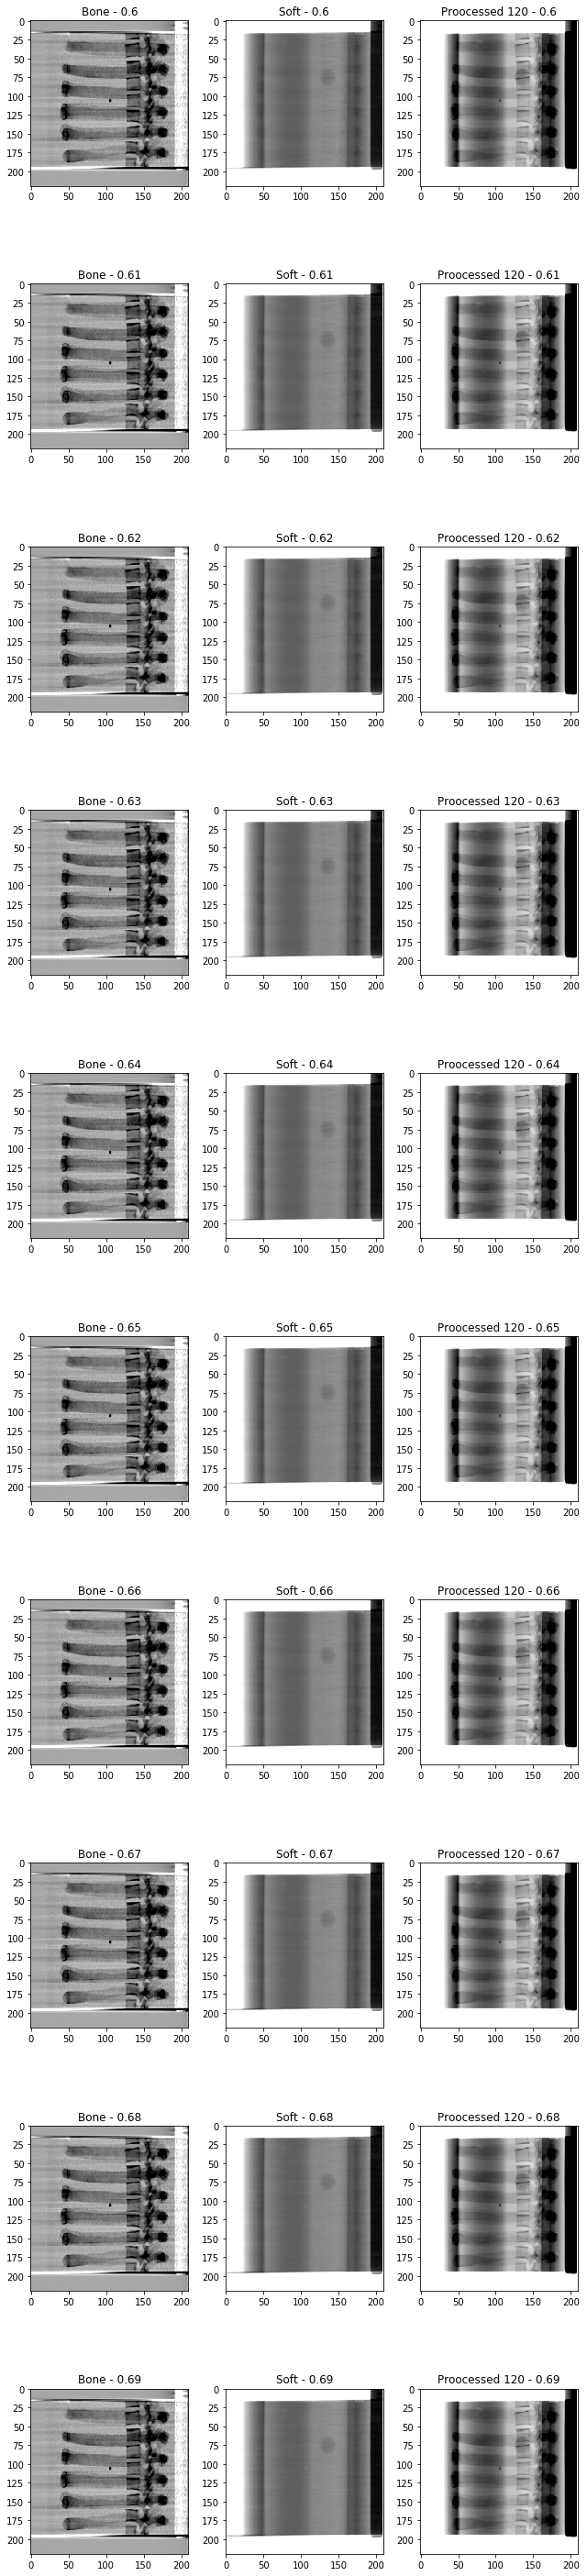

In [7]:
%matplotlib inline
fig, ax = plt.subplots(nrows=len(subtracted_dict), ncols=3, figsize=(9, 4*len(subtracted_dict)))
for i, (weight, sd) in enumerate(subtracted_dict.items()):
    ax[i][0].imshow(sd['Bone'], cmap='gray', vmin=sd['vmin_b'], vmax=sd['vmax_b'])
    ax[i][0].set_title(f'Bone - {weight}')
    ax[i][1].imshow(sd['Soft'], cmap='gray', vmin=sd['vmin_s'], vmax=sd['vmax_s'])
    ax[i][1].set_title(f'Soft - {weight}')
    ax[i][2].imshow(processed_120, cmap='gray', vmin=sd['vmin'], vmax=sd['vmax'])
    ax[i][2].set_title(f'Proocessed 120 - {weight}')

fig.tight_layout()

## ROI Visualization 

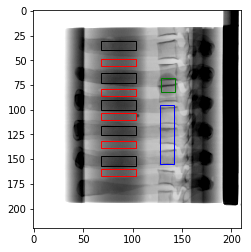

In [8]:
#format: ((x, y), dx, dy) 990, 118, 148
ribs_roi_list = [[(68, 30), 35, 10],
                 [(68, 63), 35, 10],
                 [(68, 90), 35, 10],
                 [(68, 116), 35, 10],
                 [(68, 147), 35, 10]]

soft_roi_list = [[(68, 49), 35, 7],
                 [(68, 79), 35, 7],
                 [(68, 103), 35, 7],
                 [(68, 132), 35, 7],
                 [(68, 160), 35, 7]]

spine_roi = [(128, 95), 14, 60]

nodule_roi = [(129, 68), 14, 14]

vmin = subtracted_dict[0.69]['vmin']
vmax = subtracted_dict[0.69]['vmax']
img = processed_120

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
for br in ribs_roi_list:
    ax.add_patch(Rectangle(*br, fill=False))
for sr in soft_roi_list:
    ax.add_patch(Rectangle(*sr, fill=False, edgecolor='red'))

ax.add_patch(Rectangle(*spine_roi, fill=False, edgecolor='blue'))
ax.add_patch(Rectangle(*nodule_roi, fill=False, edgecolor='green'))
    
plt.show()

In [59]:
contrast_vals_soft = []
ws_list = []
raw_values = {'bone':[], 'soft':[]}
for weight_soft in range(101):
    ws = weight_soft/100
    dual_energy_soft = processed_140 - ws*processed_80
    #TO DO: add clipping behavior to replicate vmin, vmax

    bone_roi_crops = []

    for br in ribs_roi_list:
        x1, y1 = br[0]
        x2 = x1 + br[1]
        y2 = y1 + br[2]
        #roi = dual_energy_soft[x1:x2, y1:y2]
        roi = dual_energy_soft[y1:y2, x1:x2]
        bone_roi_crops.append(roi)
#     x1, y1 = spine_roi[0]
#     x2 = x1 + spine_roi[1]
#     y2 = y1 + spine_roi[2]
#     roi = dual_energy_soft[x1:x2, y1:y2]
#     bone_roi_crops.append(roi)
    
    soft_roi_crops = []

    for sr in soft_roi_list:
        x1, y1 = sr[0]
        x2 = x1 + sr[1]
        y2 = y1 + sr[2]
        #roi = dual_energy_soft[x1:x2, y1:y2]
        roi = dual_energy_soft[y1:y2, x1:x2]
        soft_roi_crops.append(roi)
    
#     x1, y1 = nodule_roi[0]
#     x2 = x1 + nodule_roi[1]
#     y2 = y1 + nodule_roi[2]
#     roi = dual_energy_soft[x1:x2, y1:y2]
#     soft_roi_crops.append(roi)
    
#     print(np.mean(bone_roi_crops), np.mean(soft_roi_crops))
    #idx = range(0,4)
    numerator = np.mean(bone_roi_crops) - np.mean(soft_roi_crops)
    denominator = (np.mean(bone_roi_crops) + np.mean(soft_roi_crops))/2
    contr = np.abs(numerator/denominator)
#     contr = np.var([np.mean(bone_roi_crops), np.mean(soft_roi_crops)])
    raw_values['bone'].append(np.mean(bone_roi_crops))
    raw_values['soft'].append(np.mean(soft_roi_crops))

    contrast_vals_soft.append(contr)
    ws_list.append(ws)

In [62]:
np.mean(bone_roi_crops[0]), np.mean(soft_roi_crops[0])

(0.08156590601404093, 0.0511088592196002)

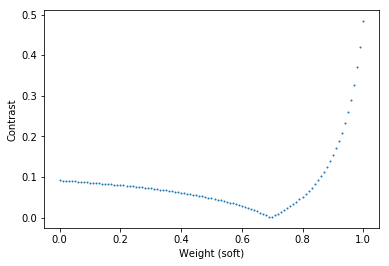

In [77]:
%matplotlib inline
plt.scatter(ws_list, contrast_vals_soft, s=1)
plt.xlabel('Weight (soft)')
plt.ylabel('Contrast')
plt.show()

In [78]:
print(f'Minimum contrast of {min(contrast_vals_soft)} is obtained at ws = {ws_list[contrast_vals_soft.index(min(contrast_vals_soft))]}')

Minimum contrast of 0.0014153327511509965 is obtained at ws = 0.7


In [68]:
contrast_vals_bone = []
wb_list = []
for weight_bone in range(201):
    wb = weight_bone/100
    dual_energy_bone = -(processed_140 - wb*processed_80)
    #TO DO: add clipping behavior to replicate vmin, vmax

    bone_roi_crops = []
    for br in ribs_roi_list:
        x1, y1 = br[0]
        x2 = x1 + br[1]
        y2 = y1 + br[2]
        #roi = dual_energy_bone[x1:x2, y1:y2]
        roi = dual_energy_bone[y1:y2, x1:x2]
        bone_roi_crops.append(roi)

    soft_roi_crops = []
    for sr in soft_roi_list:
        x1, y1 = sr[0]
        x2 = x1 + sr[1]
        y2 = y1 + sr[2]
        #roi = dual_energy_bone[x1:x2, y1:y2]
        roi = dual_energy_bone[y1:y2, x1:x2]
        soft_roi_crops.append(roi)
        
#     print([bc.shape for bc in soft_roi_crops])
#     break
    
    numerator = np.mean(bone_roi_crops) - np.mean(soft_roi_crops)
    denominator = (np.mean(bone_roi_crops) + np.mean(soft_roi_crops))/2
    contr = np.abs(numerator/denominator)

    contrast_vals_bone.append(contr)
    wb_list.append(wb)

In [69]:
np.mean(bone_roi_crops)

0.6031086081296331

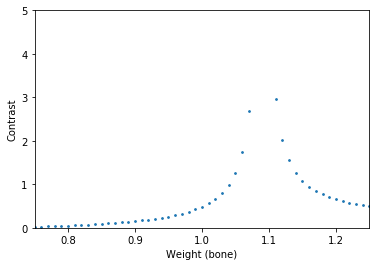

In [73]:
%matplotlib inline
plt.scatter(wb_list, contrast_vals_bone, s=3)
plt.xlabel('Weight (bone)')
plt.ylabel('Contrast')
plt.ylim([0,5])
plt.xlim([0.75,1.25])
plt.show()

In [74]:
print(f'Maximum contrast of {max(contrast_vals_bone)} is obtained at wb = {wb_list[contrast_vals_bone.index(max(contrast_vals_bone))]}')

Maximum contrast of 1168.2501688771044 is obtained at wb = 1.09


In [18]:
subtracted_dict = {}
for weight in [0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]:
#     weight = 0.65
#     weight /= 100
    dual_energy_soft = processed_140 - weight*processed_80
#     weight = 1
    # TO DO try different weights for bone?
    dual_energy_bone = -1*(processed_140 - weight*processed_80)
    # dual_energy_bone = weight * processed_140 - weight*processed_80

    mean_s = np.mean(dual_energy_soft[120:200, 50:150])
    std_s = np.std(dual_energy_soft[120:200, 50:150])
    w=3
    vmin_s = mean_s - w*std_s
    vmax_s = mean_s + w*std_s

    mean_b = np.mean(dual_energy_bone[50:150, 50:150])
    std_b = np.std(dual_energy_bone[50:150, 50:150])
    w=3
    vmin_b = mean_b - w*std_b
    vmax_b = mean_b + w*std_b

    mean_0 = np.mean(processed_120[50:150, 50:150])
    std_0 = np.std(processed_120[50:150, 50:150])
    w=3
    vmin = mean_0 - w*std_0
    vmax = mean_0 + w*std_0
    
    subtracted_dict[weight] = {'Bone': dual_energy_bone,
                               'Soft': dual_energy_soft,
                               'vmin_s': vmin_s,
                               'vmax_s': vmax_s,
                               'vmin_b': vmin_b,
                               'vmax_b': vmax_b,
                               'vmin': vmin,
                               'vmax': vmax}

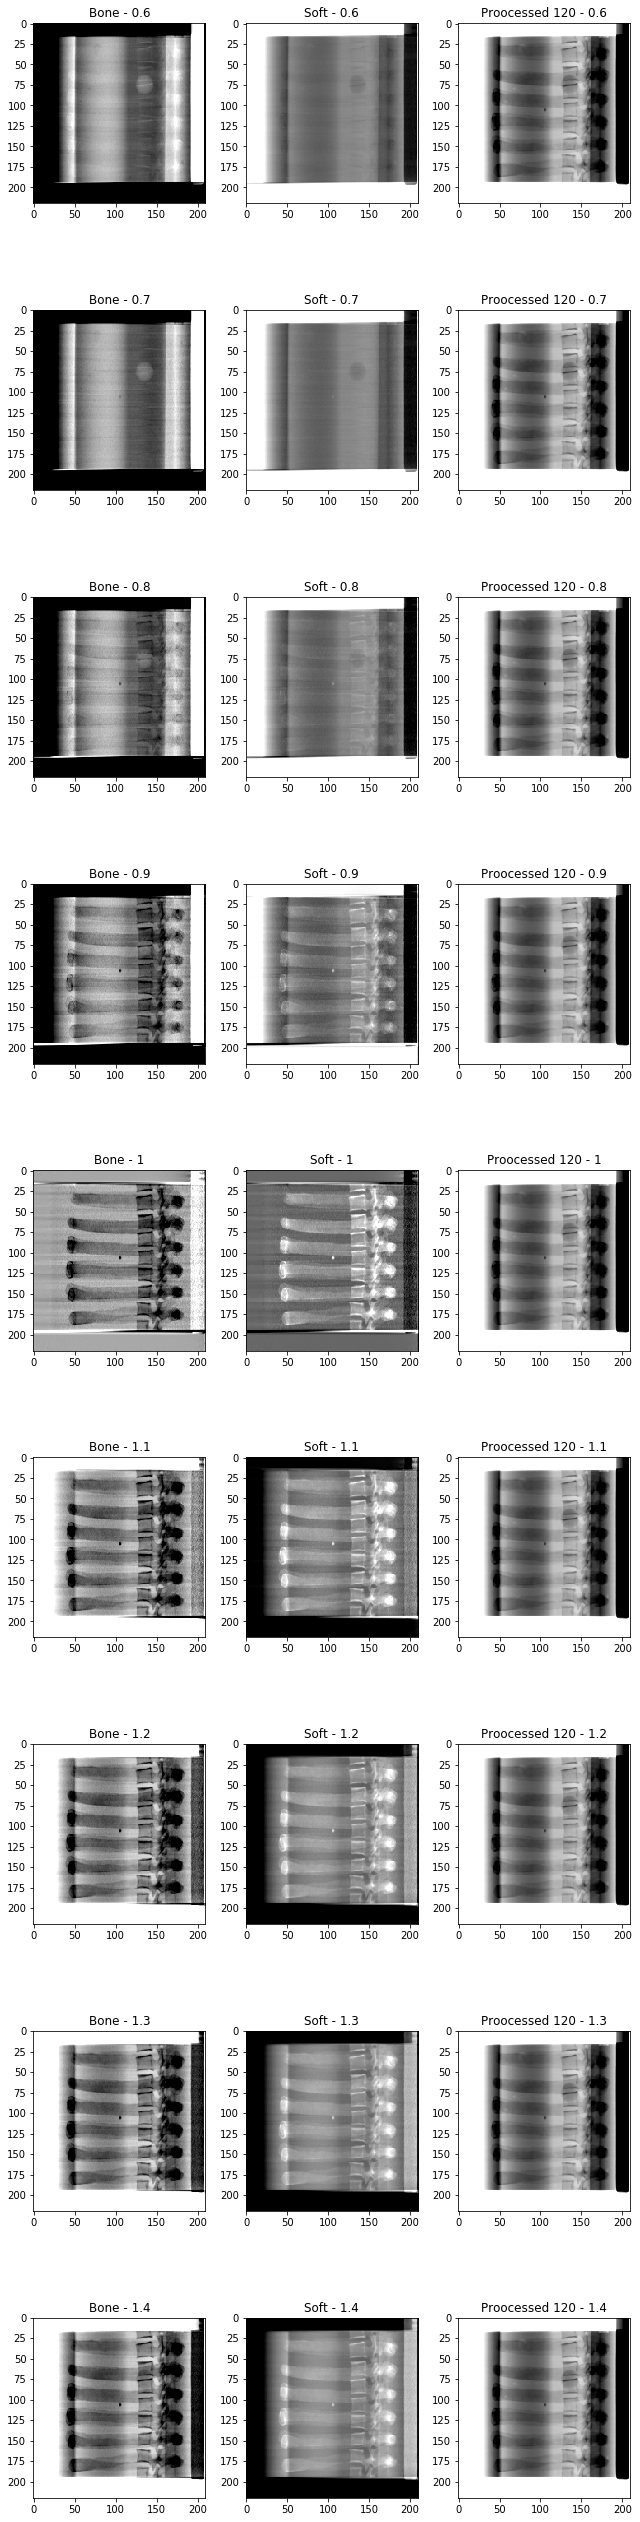

In [19]:
%matplotlib inline
fig, ax = plt.subplots(nrows=len(subtracted_dict), ncols=3, figsize=(9, 4*len(subtracted_dict)))
for i, (weight, sd) in enumerate(subtracted_dict.items()):
    ax[i][0].imshow(sd['Bone'], cmap='gray', vmin=sd['vmin_b'], vmax=sd['vmax_b'])
    ax[i][0].set_title(f'Bone - {weight}')
    ax[i][1].imshow(sd['Soft'], cmap='gray', vmin=sd['vmin_s'], vmax=sd['vmax_s'])
    ax[i][1].set_title(f'Soft - {weight}')
    ax[i][2].imshow(processed_120, cmap='gray', vmin=sd['vmin'], vmax=sd['vmax'])
    ax[i][2].set_title(f'Proocessed 120 - {weight}')

fig.tight_layout()

In [5]:
folder_120 = "/data/public/NANO_dual_energy/20211205_cirs_phantom_kvs/120kV/2021-12__Studies/drr/compound_rotations"
folder_140 = "/data/public/NANO_dual_energy/20211205_cirs_phantom_kvs/140kV/2021-12__Studies/drr/compound_rotations"
folder_80 = "/data/public/NANO_dual_energy/20211205_cirs_phantom_kvs/80kV/2021-12__Studies/drr/compound_rotations"
array_names_list_120 = sorted(os.listdir(folder_120))
array_names_list_140 = sorted(os.listdir(folder_140))
array_names_list_80 = sorted(os.listdir(folder_80))


ws = 0.7
wb = 1.09

folder_soft = "/data/public/NANO_dual_energy/20211205_cirs_phantom_kvs/DE_subtracted/compund_rotations/soft"
folder_bone = "/data/public/NANO_dual_energy/20211205_cirs_phantom_kvs/DE_subtracted/compund_rotations/bone"

for idx in range(len(array_names_list_120)):
    if not idx % 45:
        print(idx, '/', len(array_names_list_120))
    filepath_120 = os.path.join(folder_120, array_names_list_120[idx])
    filepath_140 = os.path.join(folder_140, array_names_list_140[idx])
    filepath_80 = os.path.join(folder_80, array_names_list_80[idx])
    
    with open(filepath_120, 'rb') as f:
        sample_drr_120 = np.load(f)
    
    with open(filepath_140, 'rb') as f:
        sample_drr_140 = np.load(f)

    with open(filepath_80, 'rb') as f:
        sample_drr_80 = np.load(f)
        
    sample_drr_120 += np.min(sample_drr_120)
    sample_drr_140 += np.min(sample_drr_140)
    sample_drr_80 += np.min(sample_drr_80)

    processed_120 = 10*np.log((sample_drr_120+0.1)/(np.max(sample_drr_120)+0.1))
    processed_140 = 10*np.log((sample_drr_140+0.1)/(np.max(sample_drr_140)+0.1))
    processed_80 = 10*np.log((sample_drr_80+0.1)/(np.max(sample_drr_80)+0.1))

    dual_energy_soft = processed_140 - ws*processed_80
    dual_energy_bone = -(processed_140 - wb*processed_80)
    
    filepth_bone = os.path.join(folder_bone, array_names_list_120[idx])
    filepth_soft = os.path.join(folder_soft, array_names_list_120[idx])
    
    with open(filepth_bone, 'wb') as f:
        np.save(f, dual_energy_bone)
        
    with open(filepth_soft, 'wb') as f:
        np.save(f, dual_energy_soft)

0 / 900
45 / 900
90 / 900
135 / 900
180 / 900
225 / 900
270 / 900
315 / 900
360 / 900
405 / 900
450 / 900
495 / 900
540 / 900
585 / 900
630 / 900
675 / 900
720 / 900
765 / 900
810 / 900
855 / 900
